In [17]:
pip install autorank

  Using cached autorank-1.1.3-py3-none-any.whl (34 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
!git clone https://github.com/phuselab/pyVHR

^C


In [12]:
cd c:/Users/q42/pyVHR/pyvhr

c:\Users\q42\pyVHR\pyvhr


In [18]:
from analysis.pipeline import Pipeline
from plot.visualize import *
from utils.errors import getErrors, printErrors, displayErrors

# params
wsize = 6                  # window size in seconds
roi_approach = 'patches'   # 'holistic' or 'patches'
bpm_est = 'clustering'     # BPM final estimate, if patches choose 'medians' or 'clustering'
method = 'welch'       # one of the methods implemented in pyVHR

ModuleNotFoundError: No module named 'pyVHR.datasets'


Processing Video: D:\code\obama carol grusch\obama et obama.mp4

BVP extraction with method: cpu_POS

BPM estimation with: welch

...done!



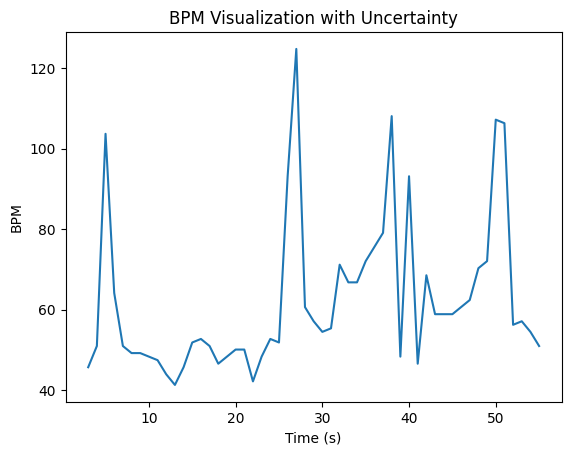

In [47]:
    import matplotlib.pyplot as plt
    from pyVHR.analysis.pipeline import Pipeline
    from pyVHR.plot.visualize import visualize_BPMs

    # Run the pipeline to get BPM data
    pipe = Pipeline()
    time, BPM, uncertainty = pipe.run_on_video("D:\code\obama carol grusch\obama et obama.mp4")

    # Create a list for the BPM signals for the pyVHR visualization function
    BPMs_list = [[BPM, time, "BPM Signal"]]

    # Visualize the BPM signal using pyVHR's function
    visualize_BPMs(BPMs_list)

    # If you still want to use matplotlib for visualization:
    plt.figure()
    plt.plot(time, BPM)
    plt.fill_between(time, BPM - uncertainty, BPM + uncertainty, alpha=0.9)
    plt.xlabel("Time (s)")
    plt.ylabel("BPM")
    plt.title("BPM Visualization with Uncertainty")
    plt.show()



Processing Video: D:\code\obama carol grusch\obama et obama.mp4

BVP extraction with method: cpu_POS

BPM estimation with: welch

...done!



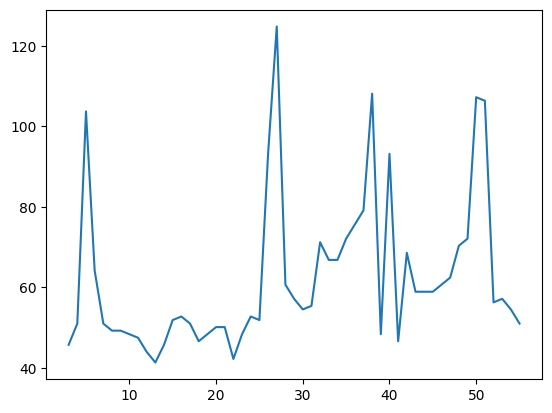

In [7]:
from  pyVHR.analysis.pipeline import  Pipeline 
pipe = Pipeline() 
time, BPM, uncertainty = pipe.run_on_video("D:\code\obama carol grusch\obama et obama.mp4")
plt.figure()
plt.plot(time, BPM)
plt.fill_between(time, BPM-uncertainty, BPM+uncertainty, alpha=0.9)
plt.show()


Processing Video: D:\code\obama carol grusch\carol et obama.mp4

BVP extraction with method: cpu_POS

BPM estimation with: welch

...done!



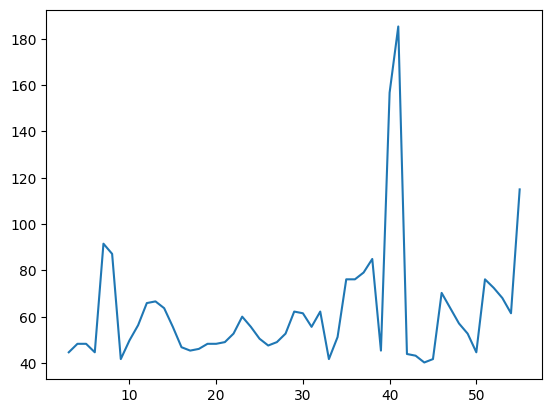

In [5]:
from  pyVHR.analysis.pipeline import  Pipeline 
pipe = Pipeline() 
time, BPM, uncertainty = pipe.run_on_video("D:\code\obama carol grusch\carol et obama.mp4")
plt.figure()
plt.plot(time, BPM)
plt.fill_between(time, BPM-uncertainty, BPM+uncertainty, alpha=0.9)
plt.show()


Processing Video: D:\code\obama carol grusch\grusch et obama.mp4

BVP extraction with method: cpu_POS

BPM estimation with: welch

...done!



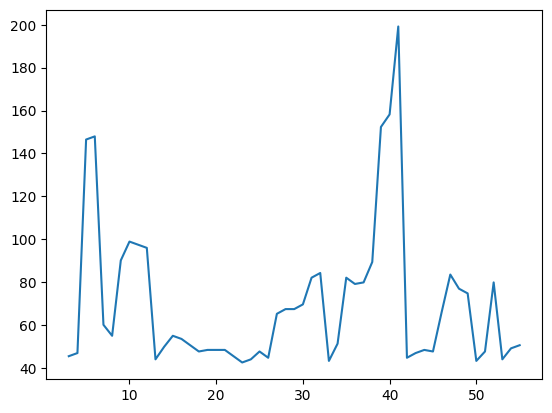

In [6]:
from  pyVHR.analysis.pipeline import  Pipeline 
pipe = Pipeline() 
time, BPM, uncertainty = pipe.run_on_video("D:\code\obama carol grusch\grusch et obama.mp4")
plt.figure()
plt.plot(time, BPM)
plt.fill_between(time, BPM-uncertainty, BPM+uncertainty, alpha=0.9)
plt.show()

In [45]:
#### TEST holistic approach
from pyVHR.analysis.pipeline import Pipeline

# params
videoFileName = "video.avi"  # your video path
roi_approach = 'holistic'   # 'holistic' or 'patches'
bpm_est = 'median'         # BPM final estimate, if patches choose 'medians' or 'clustering'
method = 'cpu_CHROM'       # one of the methods implemented in pyVHR
pipe = Pipeline()          # object to execute the pipeline

# run
bvps, timesES, bpmES = pipe.run_on_video(videoFileName,
                                        roi_method='convexhull',
                                        roi_approach=roi_approach,
                                        method=method,
                                        estimate=bpm_est,
                                        patch_size=40, 
                                        RGB_LOW_HIGH_TH=(5,230),
                                        Skin_LOW_HIGH_TH=(5,230),
                                        pre_filt=True,
                                        post_filt=True,
                                        cuda=False, 
                                        verb=True
)

TypeError: run_on_video() got an unexpected keyword argument 'estimate'

In [9]:
sig_extractor = vhr.extraction.SignalProcessing()


C:\Users\q42\AppData\Local\Temp\ipykernel_73864\2239025731.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_bpm = all_bpm.append(df, ignore_index=True)
C:\Users\q42\AppData\Local\Temp\ipykernel_73864\2239025731.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_bpm = all_bpm.append(df, ignore_index=True)
C:\Users\q42\AppData\Local\Temp\ipykernel_73864\2239025731.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_bpm = all_bpm.append(df, ignore_index=True)
C:\Users\q42\AppData\Local\Temp\ipykernel_73864\2239025731.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_bpm = all_bpm.append(df, ignore_index=True)
C:\U

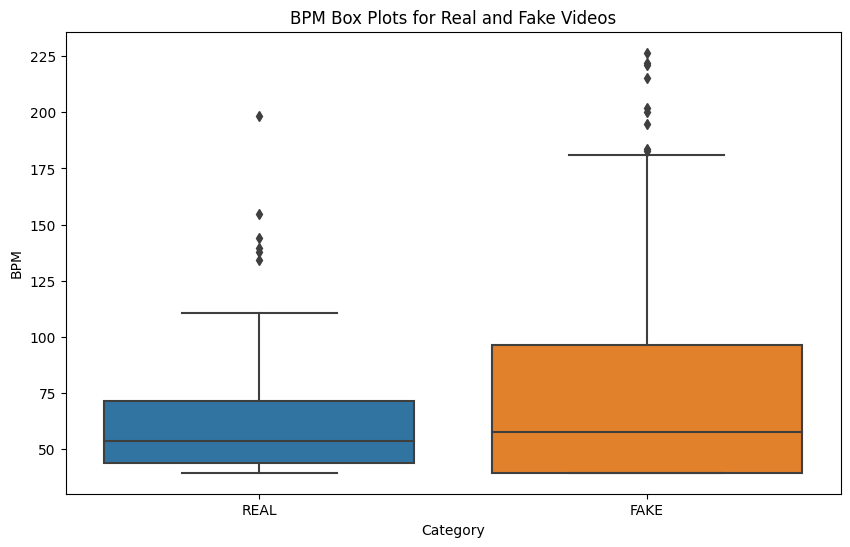

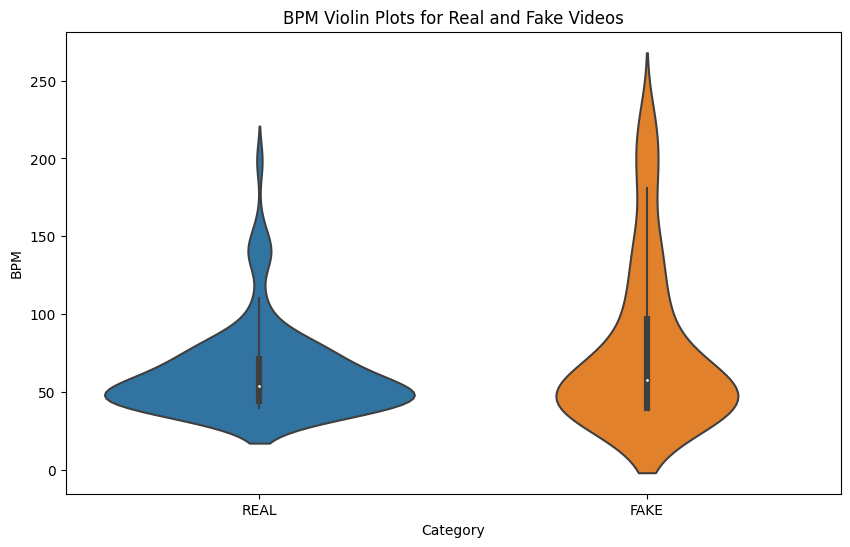

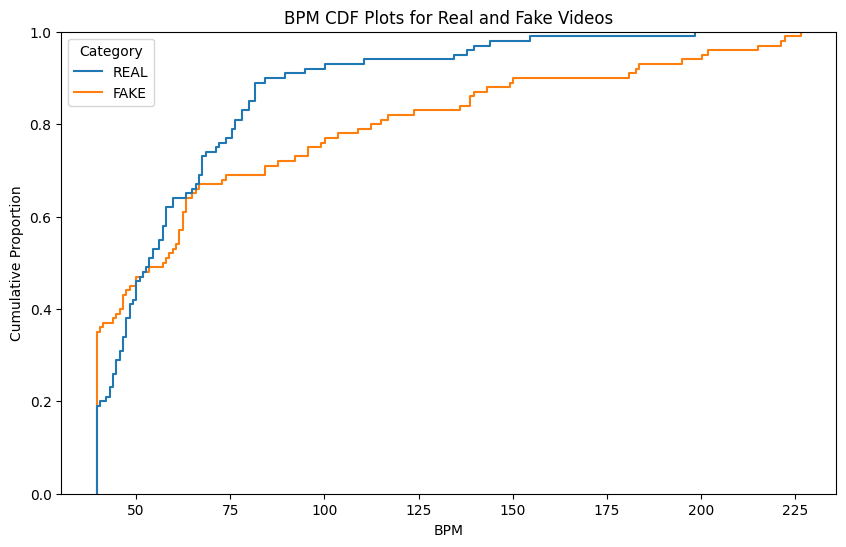

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# directories
dirs = ["D:/DFDC deepfakes subset/dfdc_train_part_00/dfdc_train_part_0/REAL", 
        "D:/DFDC deepfakes subset/dfdc_train_part_00/dfdc_train_part_0/FAKE"]

# initialize an empty DataFrame to store all BPM values
all_bpm = pd.DataFrame()

# loop over directories
for directory in dirs:
    # get all CSV files in the directory
    csv_files = [f for f in os.listdir(directory) if f.endswith('_output.csv')]
    
    # loop over CSV files
    for csv_file in csv_files:
        csv_path = os.path.join(directory, csv_file)
        df = pd.read_csv(csv_path)

        # add a column to indicate the category (real or fake)
        df['Category'] = os.path.basename(os.path.normpath(directory))

        # append the DataFrame to the all_bpm DataFrame
        all_bpm = all_bpm.append(df, ignore_index=True)

# create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_bpm, x='Category', y='BPM')
plt.title('BPM Box Plots for Real and Fake Videos')
plt.xlabel('Category')
plt.ylabel('BPM')
plt.show()

# create violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=all_bpm, x='Category', y='BPM')
plt.title('BPM Violin Plots for Real and Fake Videos')
plt.xlabel('Category')
plt.ylabel('BPM')
plt.show()

# create CDF plots
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=all_bpm, x='BPM', hue='Category')
plt.title('BPM CDF Plots for Real and Fake Videos')
plt.xlabel('BPM')
plt.ylabel('Cumulative Proportion')
plt.show()


In [ ]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

# Preprocess the data
X = all_bpm[['BPM']]  # Assuming BPM is the feature you want to use
y = all_bpm['Category'].map({'REAL': 0, 'FAKE': 1})  # Encode the category as 0 for REAL and 1 for FAKE

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Define hyperparameters
param_grid = {
    'svm__C': np.logspace(-3, 3, 7),
    'svm__gamma': ['scale', 'auto'] + list(np.logspace(-4, 2, 7))
}

# Create a pipeline with normalization and model training steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', random_state=42))
])

# Perform a grid search with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = grid_search.predict(X_val)
print(classification_report(y_val, y_pred_val))

# If validation performance is satisfactory, evaluate on the test set
y_pred_test = grid_search.predict(X_test)
print(classification_report(y_test, y_pred_test))

print(f"Best hyperparameters found by grid search: {grid_search.best_params_}")


              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.70      0.70      0.70        20

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        21
           1       0.74      0.74      0.74        19

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.75      0.75      0.75        40

Best hyperparameters found by grid search: {'svm__C': 1.0, 'svm__gamma': 100.0}


C:\Users\q42\AppData\Local\Temp\ipykernel_73864\1278697422.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train.loc[y_train == 0, 'BPM'], shade=True, label='REAL')
C:\Users\q42\AppData\Local\Temp\ipykernel_73864\1278697422.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train.loc[y_train == 1, 'BPM'], shade=True, label='FAKE')


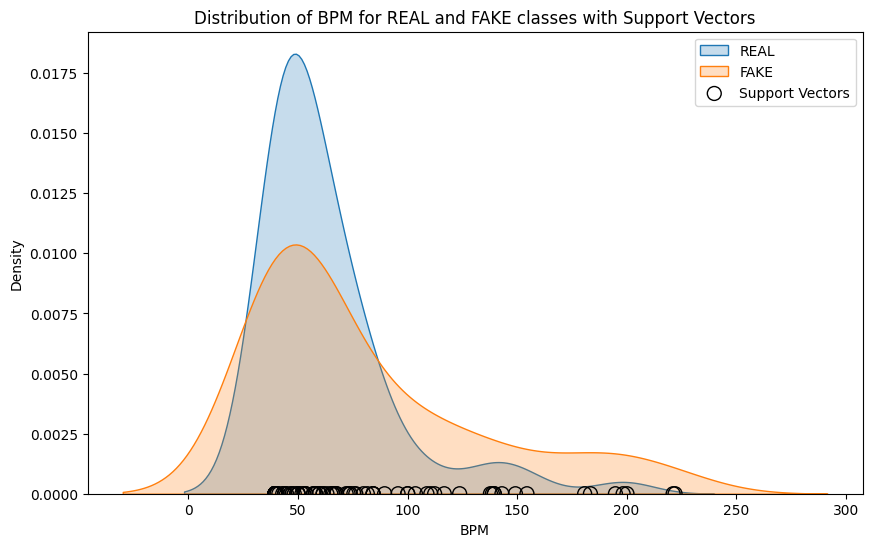

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the distribution of BPM for both classes
sns.kdeplot(X_train.loc[y_train == 0, 'BPM'], shade=True, label='REAL')
sns.kdeplot(X_train.loc[y_train == 1, 'BPM'], shade=True, label='FAKE')

# Highlight the support vectors
plt.scatter(support_vectors, 
            np.zeros_like(support_vectors), 
            s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

plt.xlabel('BPM')
plt.ylabel('Density')
plt.title('Distribution of BPM for REAL and FAKE classes with Support Vectors')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import os
from scipy.stats import skew

# Folders containing your CSV files
real_folder = 'D:/DFDC deepfakes subset/dfdc_train_part_00/dfdc_train_part_0/REAL'
fake_folder = 'D:/DFDC deepfakes subset/dfdc_train_part_00/dfdc_train_part_0/FAKE'

# Function to compute statistics for a single file
def compute_statistics(filepath):
    df = pd.read_csv(filepath)
    mean_bpm = df['BPM'].mean()
    skewness_bpm = skew(df['BPM'])
    # Add more statistics as needed
    return mean_bpm, skewness_bpm

# Lists to collect data
statistics = []
labels = []

# Iterate through REAL files and only process CSV files
for filename in os.listdir(real_folder):
    if filename.endswith('.csv'):
        filepath = os.path.join(real_folder, filename)
        mean_bpm, skewness_bpm = compute_statistics(filepath)
        statistics.append([mean_bpm, skewness_bpm])
        labels.append(0)  # REAL is encoded as 0

# Iterate through FAKE files and only process CSV files
for filename in os.listdir(fake_folder):
    if filename.endswith('.csv'):
        filepath = os.path.join(fake_folder, filename)
        mean_bpm, skewness_bpm = compute_statistics(filepath)
        statistics.append([mean_bpm, skewness_bpm])
        labels.append(1)  # FAKE is encoded as 1

# Create DataFrame with the computed features
df_features = pd.DataFrame(statistics, columns=['mean_bpm', 'skewness_bpm'])
df_features['label'] = labels

# Save DataFrame to a CSV file for each class
df_features[df_features['label'] == 0].to_csv('real_features.csv', index=False)
df_features[df_features['label'] == 1].to_csv('fake_features.csv', index=False)

# Now df_features can be used with the t-SNE code from earlier


C:\Users\q42\AppData\Local\Temp\ipykernel_73864\967064021.py:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_bpm = skew(df['BPM'])
C:\Users\q42\AppData\Local\Temp\ipykernel_73864\967064021.py:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_bpm = skew(df['BPM'])
C:\Users\q42\AppData\Local\Temp\ipykernel_73864\967064021.py:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_bpm = skew(df['BPM'])
C:\Users\q42\AppData\Local\Temp\ipykernel_73864\967064021.py:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are ne

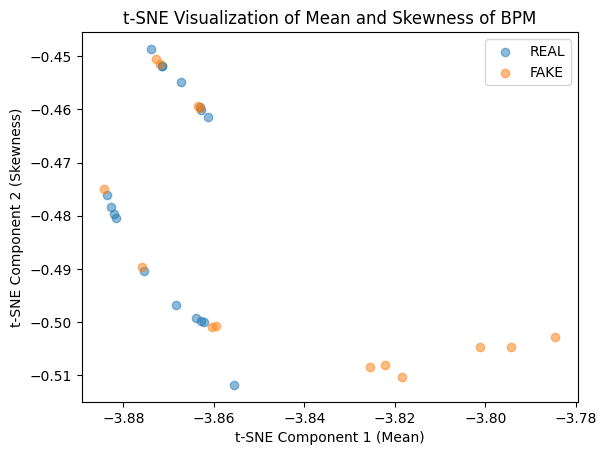

In [21]:
# Extract the mean and skewness features
X = X.dropna()

# Apply t-SNE transformation
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# You'll also want to make sure that your labels are aligned with the cleaned X
labels_clean = df_features['label'].loc[X.index]

# Plot the transformed data, coloring by label
plt.scatter(X_tsne[labels_clean == 0, 0], X_tsne[labels_clean == 0, 1], label='REAL', alpha=0.5)
plt.scatter(X_tsne[labels_clean == 1, 0], X_tsne[labels_clean == 1, 1], label='FAKE', alpha=0.5)
plt.legend()
plt.xlabel('t-SNE Component 1 (Mean)')
plt.ylabel('t-SNE Component 2 (Skewness)')
plt.title('t-SNE Visualization of Mean and Skewness of BPM')
plt.show()


# Part 3 

In [16]:
pip install .


Processing c:\users\q42\pyvhr
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyVHR: filename=pyVHR-0.0.4-py3-none-any.whl size=62832 sha256=aff515e7be3965ab8afe696985f1815b8f4b2fa1a30ef896815053fc47d02f73
  Stored in directory: C:\Users\q42\AppData\Local\Temp\pip-ephem-wheel-cache-dhos0288\wheels\51\3b\97\87e84bcd617d58400ae06edb34cffc15fd9217f6035f5190a0
Successfully built pyVHR
  Attempting uninstall: pyVHR
    Found existing installation: pyVHR 2.0
    Uninstalling pyVHR-2.0:
      Successfully uninstalled pyVHR-2.0
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install dlib

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build dlib


  ERROR: Command errored out with exit status 1:
   command: 'c:\Users\q42\.conda\envs\pyvhr\python.exe' 'c:\Users\q42\.conda\envs\pyvhr\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\q42\AppData\Local\Temp\tmpprjuahap'
       cwd: C:\Users\q42\AppData\Local\Temp\pip-install-ms8x2n_d\dlib_568d58f3dada4db5ab1a440f4c595343
  Complete output (338 lines):
  running bdist_wheel
  running build
  running build_ext
  <string>:125: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  Building extension for Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
  Invoking CMake setup: 'cmake C:\Users\q42\AppData\Local\Temp\pip-install-ms8x2n_d\dlib_568d58f3dada4db5ab1a440f4c595343\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\q42\AppData\Local\Temp\pip-install-ms8x2n_d\dlib_568d58f3dada4db5ab1a440f4c595343\build\lib.win-amd64-cpython-39 -DPYTHON_EXECUTABLE=c:\Users\q42\.conda\envs\pyvhr\

In [20]:
# -- Modules and packages to import for demo
from pyVHR.signals.video import Video
from pyVHR.methods.pos import POS
from pyVHR.methods.chrom import CHROM
from pyVHR.analysis.testsuite import TestSuite, TestResult


In [38]:
cd "C:/Users/q42/pyvhr"

C:\Users\q42\pyvhr


In [35]:
# -- Modules and packages to import for demo
from pyVHR.signals.video import Video
from pyVHR.methods.pos import POS
from pyVHR.methods.chrom import CHROM
from pyVHR.analysis.testsuite import TestSuite, TestResult

# -- Video object
videoFilename = "grusch et obama", "mp4"
video = Video(videoFilename)


In [ ]:

# -- extract faces
video.getCroppedFaces(detector='mtcnn', extractor='skvideo')

video.printVideoInfo()

print("\nShow video cropped faces, crop size:", video.cropSize)
video.showVideo()

# -- define ROIs: free rectangular regions
video.setMask(typeROI='rect', rectCoords=[[15,20,140,50],[10,120,100,30]])
video.printROIInfo()
video.showVideo()

# -- define ROIs: standard regions, i.e. 'forehead', 'lcheek', 'rcheek', 'nose'
video.setMask(typeROI='rect', rectRegions=['forehead', 'lcheek', 'rcheek', 'nose'])
video.printROIInfo()
video.showVideo()

# -- define ROIs: using skin, with threshold param 
video.setMask(typeROI='skin_adapt', skinThresh_adapt=0.2)
video.printROIInfo()
video.showVideo()
